---

#  Mplfinance Used To Plot Dochian Channel

---

### What is Dochian Channel
Donchian Channel is a volatility indicator that helps technical analysts to identify and define price trends as well as determine the optimal entry and exit points in ranging markets.:

- Visually, the Donchian Channel features a median band that is enclosed by an upper band and a lower band.
- While the latter’s bands are determined by standard deviation, Donchian Channel bands are determined by the high and low prices an asset has reached over a certain period.
- This helps to eliminate potentially distorted information that can be caused by spiky, unsustainable price movements.

---

### mplfinance 'yahoo' styles was used to customize:
- Type of Plot Use `candle`
- Dochian Channel Build With Three Types Lines Named Upper Band, Middle Band and Lower Band
- Background, Grid, and Figure Colors
- Grid style
- Y-Axis On The Right or Left
- Matplotlib Defaults
- Fill Between
- Alpha
- Color
#### The simplest way to do this is to choose one of the `add_plot` that come packaged with `mplfinance`
#### but, as we see below, it is also possible to customize your own `mplfinance styles`.
#### Also Other Plot Type Can Be Used

---

In [1]:
import pandas as pd
import mplfinance as mpf

In [2]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Read in daily data for the S&P 500 from November of 2019 

In [3]:
idf = pd.read_csv('data/yahoofinance-INTC-19950101-20040412.csv',index_col=0,parse_dates=True).tail(200)

df = idf.copy()
df.index.name = 'Date'
df.shape
df.head(2)
df.tail(2)

(200, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-06-25,20.530001,20.83,19.99,20.040001,13.693501,61250600
2003-06-26,20.299999,20.76,20.15,20.629999,14.096654,52904900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-04-07,28.08,28.129999,27.480000,27.620001,18.923342,72680200
2004-04-08,28.08,28.139999,27.200001,27.370001,18.752058,71791400


---
- **Donchian Channel has 3 lines: Upper Band, Median Band and Lower Band. They are calculated as follows:**

- Upper Band = The Highest High in the previous n periods
- Lower Band = The Lowest Low in the previous n periods
- Median Band = ((Upper Band – Lower Band))/2)
- **Here is Following Calculation:**
---

In [4]:
#For Calcultation Dochian Channel
period = 10
df['Upper'] = df['High'].rolling(period).max()
df['Lower'] = df['Low'].rolling(period).min()
df['Middle'] = (df['Upper'] + df['Lower']) / 2


In [5]:
# Data Extracted And New Variable Applied
DCU = df[['Upper']]
DCM = df[['Middle']]
DCL = df[['Lower']]

---

Let's say we want to plot the Ichimoku Cloud along with the basic OHLCV plot.  

We Use `make_addplot()` to create the addplot dict, and pass that into the plot() function:

We Use `Color` To Define Line Colors

We Use `alpha` To Define Depth Line Color

In [6]:
apds = [
    mpf.make_addplot(DCU,color='#2962FF',panel=0,),
    mpf.make_addplot(DCM,color='#FF6D00',panel=0,),
    mpf.make_addplot(DCL,color='#2962FF',panel=0,),
]

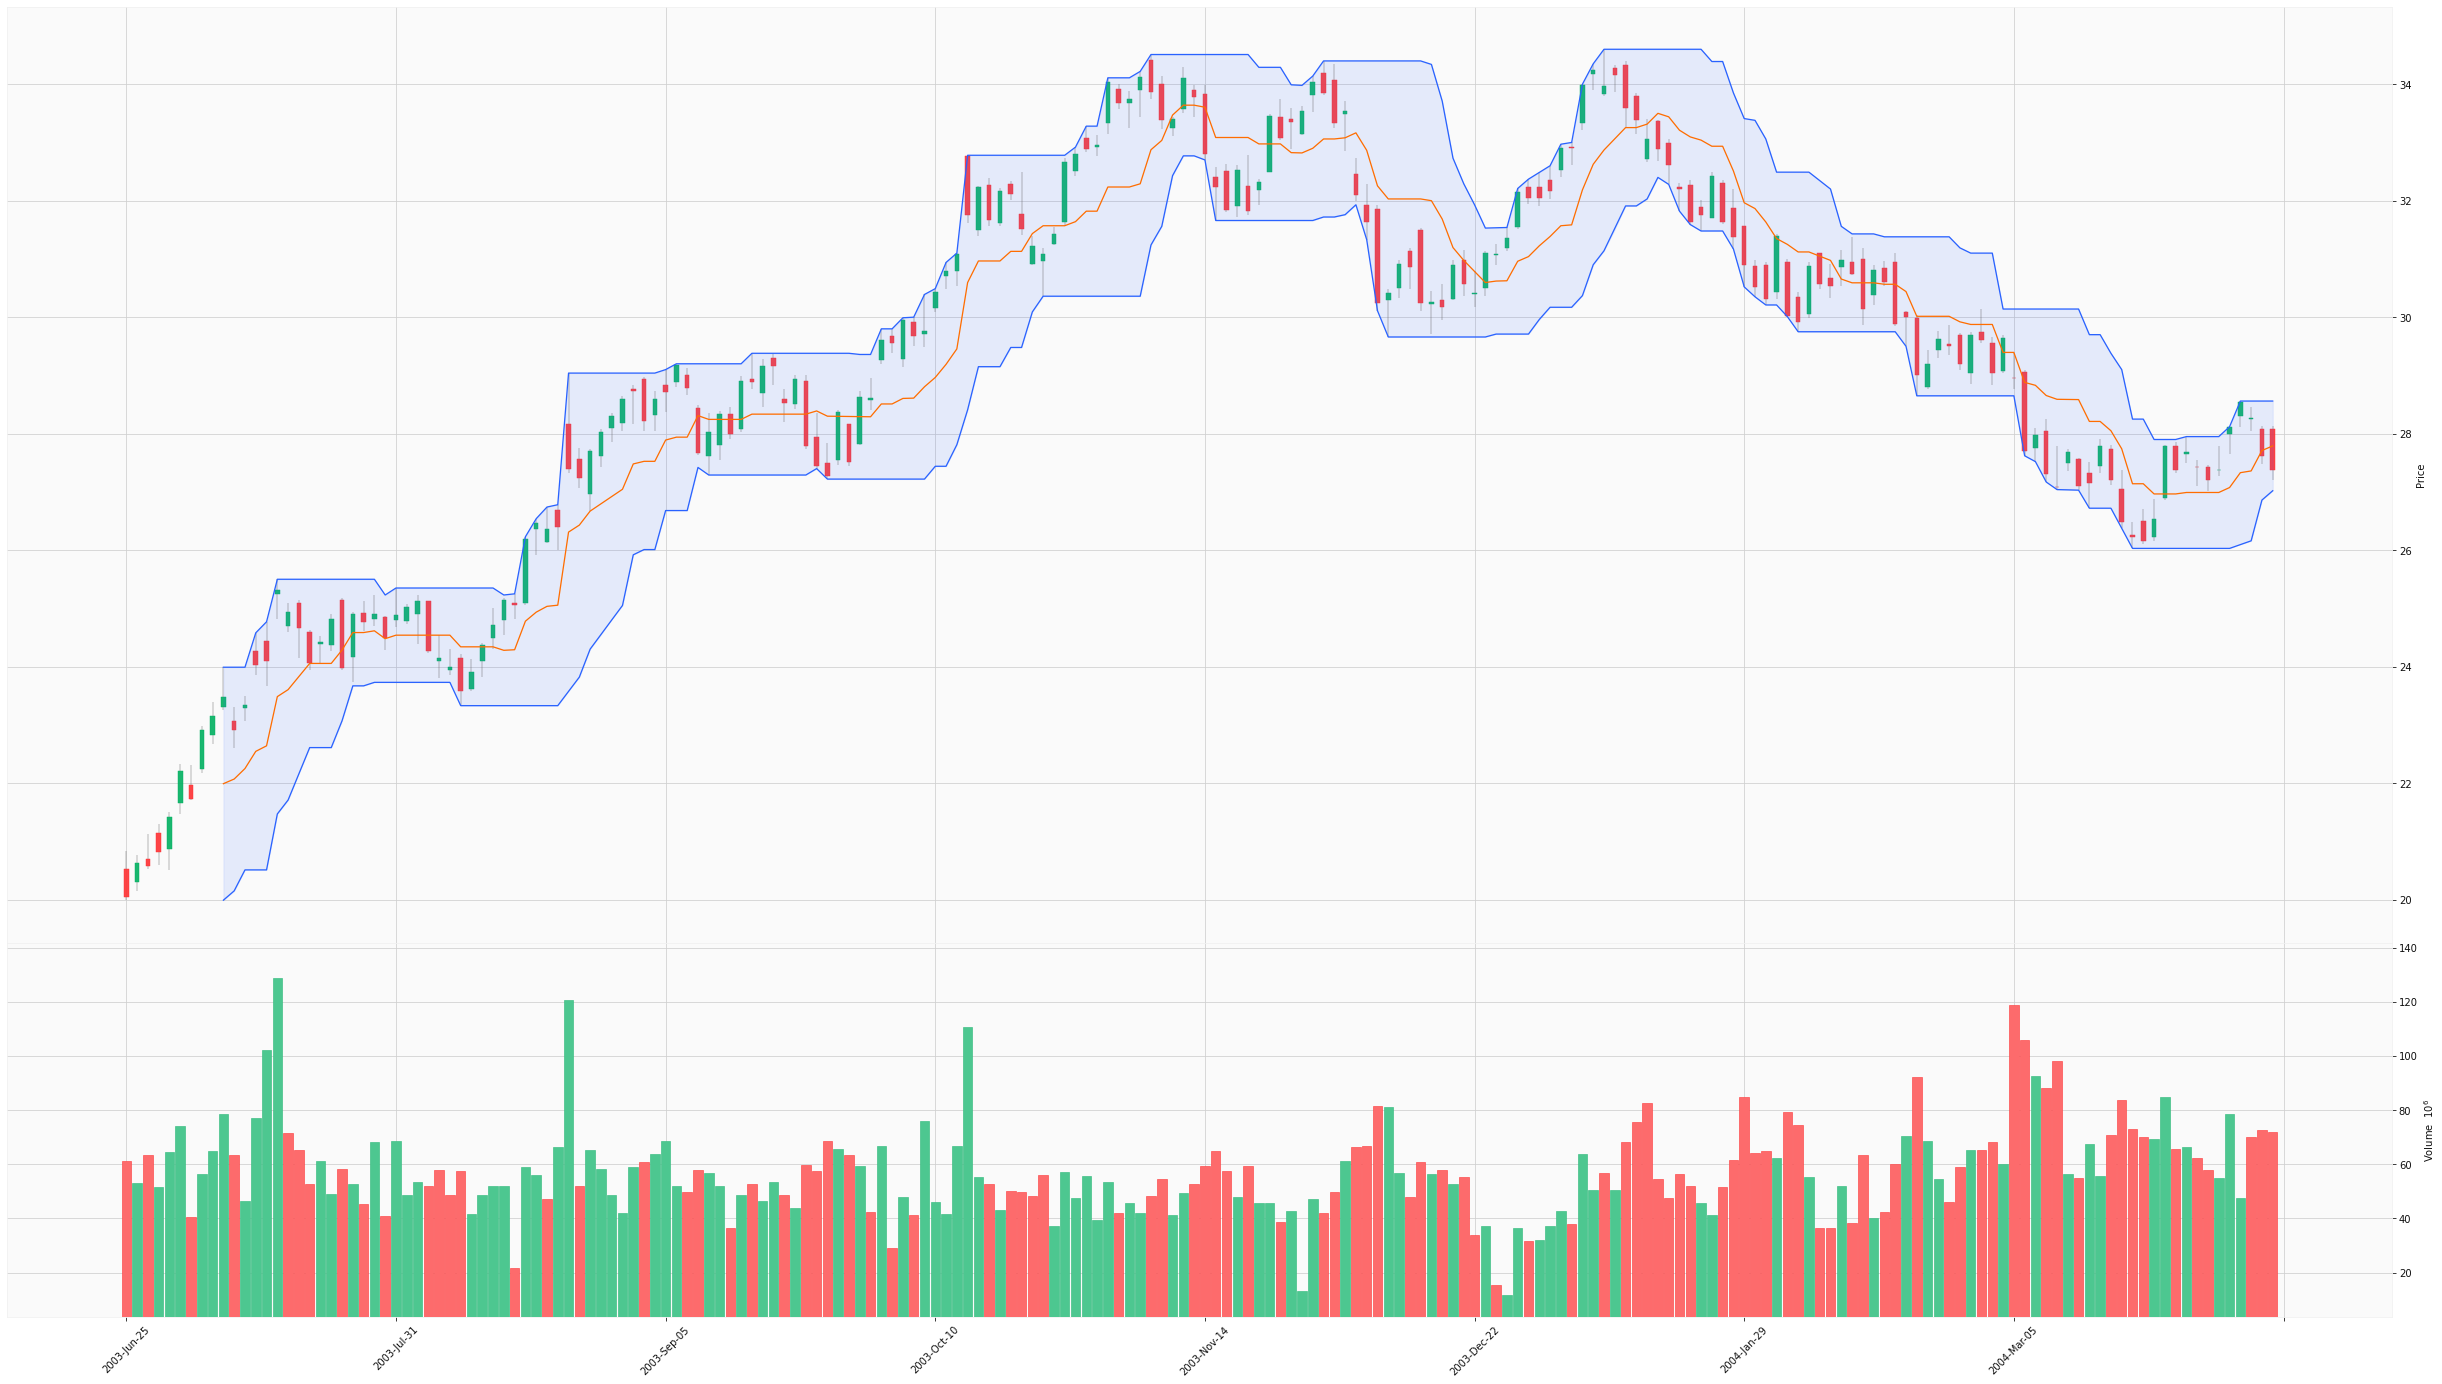

In [7]:
mpf.plot(
    df,
    volume=True,
    type="candle",
    fill_between=dict(y1=df['Upper'].values,y2=df['Lower'].values,alpha=0.1,color='#2962FF'),
    style="yahoo",
    addplot=apds,
    figscale=1.2,
    figsize=(46,26,),
    
)